<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/14_Cross_lingual_Language_Model_Pretraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cross-lingual Language Model Pretraining

## Abstract 

최근의 연구는 영어 자연어 이해를 위한 생성적 사전 훈련의 효율성을 입증했다. 

이 연구에서는 이 접근 방식을 다국어로 확장하고 교차 언어 사전 훈련의 효과를 보여준다. 

우리는 교차 언어 모델(XLM)을 학습하기 위한 두 가지 방법을 제안한다. 

하나는 단일 언어 데이터에만 의존하는 비지도 방식이고, 

다른 하나는 새로운 교차 언어 모델 목표로 병렬 데이터를 활용하는 감독 방식이다. 

우리는 교차 언어 분류, 비지도 및 지도 기계 번역에 대한 최신 결과를 얻는다. 

XNLI에서 우리의 접근 방식은 4.9%의 절대적인 정확도로 최첨단 기술을 구현한다.

unsupervised  machine translation에서 우리는 WMT'16 독일-영어에서 34.3 BLEU를 획득하여 이전의 기술 상태를 9 BLEU 이상 향상시켰다. 

supervised  machine translation에서, 우리는 WMT'16 루마니아어-영어에 대한 38.5 BLEU의 새로운 최첨단 기술을 얻어, 4 BLEU 이상의 이전 최고 접근 방식을 능가한다. 

우리의 코드와 사전 검증된 모델은 공개적으로 제공될 것이다.

## Introduction

문제점
- Bert와 같은 기존의 pre-training model 들이 좋은 성능을 보였지만, 대부분 영어를 중심으로 연구가 진행되었다. 

- 이러한 문제를 해결하기 위해 다국어로 확장하는 연구가 진행됨.

해결책 
- 이에 대한 해결책으로 여러 언어가 하나의 임베딩 공간을 공유하여, 어떤 문장이라도 해당 임베딩 공간에 인코딩할 수 있는 Universal cross-lingual encoder 를 만들고자 함

제안 
- 여러 언어간 이해 벤치마크 데이터셋에서 교차 언어모델의 사전 학습의 효과를 입증하고자 함.
    1. 새로운 비지도 학습 방법 제시
    2. 병렬데이터를 이용할 수 있는 지도 학습 방법 제시
    3. 기계번역에서의 성능평가
    4. Low resource 언어의 복잡도 개선 




## Shared sub-word vocabulary 


In [ ]:
Byte Pair Encoding(BPE)
- 단일 말뭉치에서 무작위로 샘플링하여 BPE를 학습하며, 이 때 샘플링할 확률은 아래 식에 근거한 다항분포를 따름.
- 아래와 같은 방법으로 샘플링 하면, low-resource와 관련된 token의 수가 증가하고, high-resource 언어와의 편향이 감소함.


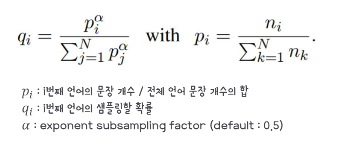

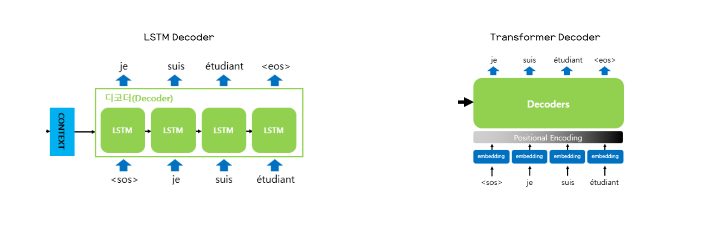

CLM : (gpt)이전에 나온 토큰으로부터 다음 토큰을 예측하도록 모델링

MLM : (bert) 단일언어에 비지도학습을 학습시킨 언어모델, 입력 문장에 대해서 임의의 토큰을 마스킹 처리하여 해당 토큰을 예측하고 전체 문장의 컨텍스트를 예측하는 모델링

제안하는 모델
    - MLM 방식은 그대로 가져가면서 
    - Multi-lingual Language Model을 개선하기 위해 병렬 코퍼스를 입력으로 넣어줌
    - 다른 언어에 대한 병렬 코퍼스를 붙이기 위해 위키피디아에서 동일한 내용의 다른언어로 이루어진 데이터를 구축함.
    - 차별화 : 입력 토큰자체가 두 가지 언어로 구성되어있음.
    - 포지션 임베딩을 바뀌는 언어의 지점에서 포지션 임베딩을 리셋해서 다시 사용
    - 동일한 포지션 임베딩을 가지는 토큰은 같은 공간을 공유한다고 생각됨.

    - low resource 코퍼스의 경우 : 해당 언어에서 현재 마스킹된 언어를 예측하기 어려울 때 다른 언어로부터 해당 토큰을 유추해서 학습 할 수 있도록 모델링 되어있음.
    



##Experiments and Results 

Data Set : XNLI 데이터 셋 
- 각 언어별 2개의 문장을 Entaliment, neutral, Contradiction 3개로 분류하는 Task



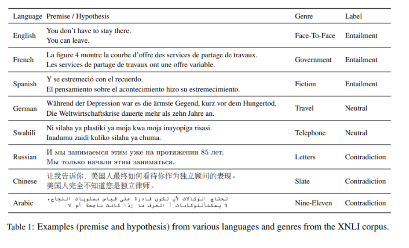

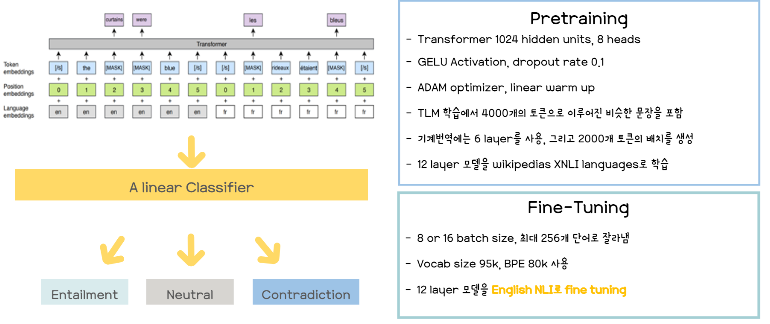

다국어 병렬 데이터셋으로 TLM을 학습한 다음 영어 NLI dataset으로 finetuning 
Pretraining : 기존 BERT와 동일한 구성이고 ,
    - 차별화 : 입력으로는 병렬 코퍼스 사용, 포지션 임베딩이 새로운 언어에서 리셋이 됨 , 
    - GELU : 음의 값에서 GV (기울기 소실)을 개선할 수 있다는 점에서 사용된 것으로 판단됨
    - TLM 학습에서 4000개의 토큰으로 이루어진 비슷한 문장을 포함 
    
    


Data set 구성 

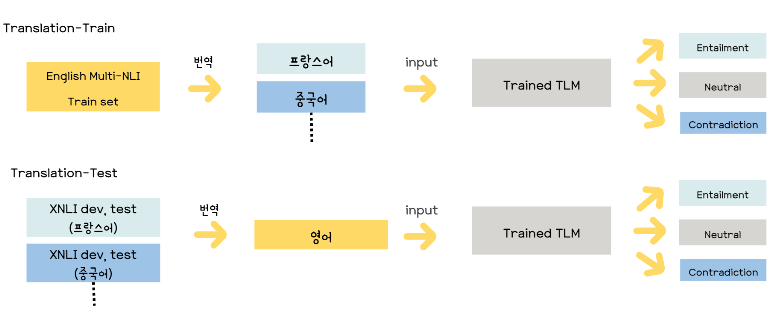

문장 인코더의 생성적 사전 훈련(Radford 등, 2018; Howard and Ruder, 2018; Devlin 등, 2018)은 수많은 자연어 이해 벤치마크의 강력한 개선으로 이어졌다(Wangetal., 2018). 

이러한 맥락에서, 트랜스포머(Vaswani 등, 2017) 언어 모델은 대규모 비지도 텍스트 말뭉치에서 학습된 다음 분류(Socheret al., 2013) 또는 자연어 추론(Bowman 등, 2015; Williams 등, 2017)과 같은 자연어 이해(NLU) 작업에 대해 미세 조정된다. 

범용 문장 표현 학습에 대한 관심이 급증했지만, 이 분야의 연구는 본질적으로 단일 언어였으며 주로 영어 벤치마크를 중심으로 이루어졌다(Conneau and Killa, 2018; Wang 등, 2018). 

많은 언어로 된 교차 언어 문장 표현을 학습하고 평가하는 최근의 발전(Conneau 등, 2018b)은 영어 중심 편향을 완화하는 것을 목표로 하며 어떤 문장을 공유 임베딩 공간으로 인코딩할 수 있는 범용 교차 언어 인코더를 구축할 수 있음을 시사한다. 

본 연구에서는 다국어 이해(XLU) 벤치마크에 대한 다국어 언어 모델의 사전 훈련 효과를 입증한다. 

정확히는 다음과 같은 기여를 합니다: 

1. 우리는 교차 언어 모델링을 사용하여 교차 언어 표현을 학습하기 위한 새로운 비지도 방법을 소개하고 두 가지 단일 언어 사전 훈련 목표를 조사한다. 

2. 병렬 데이터를 사용할 수 있을 때 교차 언어 사전 훈련을 개선하는 새로운 지도 학습 목표를 소개한다. 

3. 우리는 교차 언어 분류, 감독되지 않은 기계 번역 및 감독된 기계 번역에서 이전의 최신 기술을 크게 능가한다. 

우리는 교차 언어 언어 모델이 저자원 언어의 복잡성을 크게 개선할 수 있다는 것을 보여준다. 

5. 우리는 우리의 코드와 훈련된 모델들을 공개적으로 이용할 수 있게 할 것이다.

## Conclustion

이 연구에서 우리는 언어 간 언어 모델(XLM) 사전 훈련의 강력한 영향을 처음으로 보여준다. 

우리는 단일 언어 말뭉치인 인과 언어 모델링(CLM)과 마스크 언어 모델링(MLM)만 필요한 두 가지 비지도 교육 목표를 조사한다. 

CLM과 MLM 접근 방식 모두 모델 사전 교육에 사용할 수 있는 강력한 교차 언어 기능을 제공한다는 것을 보여준다. 

감독되지 않은 기계 번역에서, 우리는 MLM 사전 훈련이 매우 효과적이라는 것을 보여준다. 

WMT'16 독일어 영어에서 34.3 BLEU라는 새로운 최첨단 기술에 도달했습니다. 
이는 이전의 최고 접근 방식을 9 BLEU 이상 능가하는 것입니다.

마찬가지로, 우리는 감독된 기계 번역에서 강력한 개선을 얻는다. 

우리는 WMT'16 루마니아어-영어 38.5 BLEU에서 새로운 최첨단 기술에 도달했다. 
이는 4 BLEU 포인트 이상의 향상에 해당한다. 

우리는 또한 교차 언어 모델을 사용하여 네팔 언어 모델의 복잡성을 개선할 수 있으며 감독되지 않은 교차 언어 단어 임베딩을 제공한다는 것을 보여준다. 

단일 병렬 문장을 사용하지 않고 XNLI 교차 언어 분류 벤치마크에서 미세 조정된 교차 언어 모델은 이미 이전에 감독된 최신 기술을 평균 1.3% 능가한다. 

우리 연구의 주요 기여는 병렬 데이터를 활용하여 교차 언어 모델 사전 훈련을 개선하는 번역 언어 모델링(TLM) 목표이다. 

TLM은 연속 문장 대신 병렬 문장 배치를 사용하여 자연스럽게 BERT MLM 접근 방식을 확장한다. 

우리는 MLM 외에 TLM을 사용함으로써 상당한 이득을 얻고 있으며, 이 감독된 접근 방식이 XNLI의 이전 최신 기술을 평균 4.9%의 정확도로 능가한다는 것을 보여준다. 

우리의 코드와 사전 검증된 모델은 공개적으로 제공될 것이다.

출처 : https://www.youtube.com/watch?v=M6RrQaWTLKU